<a href="https://colab.research.google.com/github/ekourkchi/incNET/blob/master/CNN_binary_classes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import sys
import os
import subprocess
from math import *
import numpy as np
from datetime import *
from pylab import *
import matplotlib as mpl
from matplotlib.widgets import Slider, Button, RadioButtons
import matplotlib.pyplot as plt
from astropy.table import Table, Column 
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.patches as patches
import scipy.misc as scimisc
import random

# from google.colab import drive
# drive.mount('/content/drive')

In [0]:
data = np.load('/content/drive/My Drive/data_64x64.npz')
images_ = data['images']
labels_ = data['labels'] 
data.close() 

1


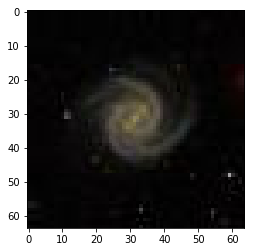

In [288]:
i = 500
print labels_[1][i]
plt.imshow(images_[i])

(array([1144., 3220., 3148., 2744., 2968., 5188., 4804., 6784., 4940.,
        9228.]),
 array([46. , 50.4, 54.8, 59.2, 63.6, 68. , 72.4, 76.8, 81.2, 85.6, 90. ]),
 <a list of 10 Patch objects>)

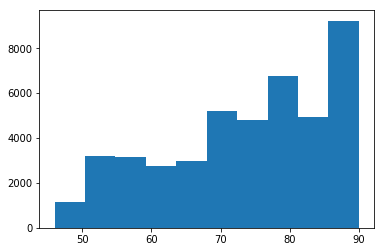

In [289]:
plt.hist(labels_[1][labels_[1]>45])

(array([8832.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        7416.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

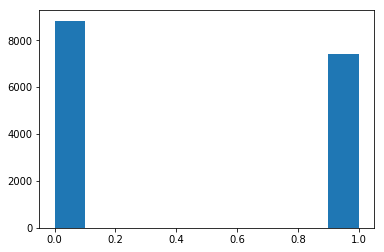

In [290]:
plt.hist(labels_[1][labels_[1]<10])

In [291]:
print images_.shape
ix, = np.where(labels_[1]<10)  # face-on or rejected

images_c = images_[ix]
labels_c = labels_[1][ix]
pgcIDs_c = labels_[0][ix]

print images_c.shape

(60468, 64, 64, 3)
(16248, 64, 64, 3)


In [0]:
def esn_shuffle(array, seed=0):
        random.seed(seed)
        random.shuffle(array)
        return array

In [0]:
n = len(labels_c)

indices = np.arange(n)
indices = esn_shuffle(indices, seed=2)


images_cc = images_c[indices]
labels_cc = labels_c[indices]
pgcIDs_cc = pgcIDs_c[indices]

#################

indices = np.arange(600)
images_test  = images_cc[indices]
labels_test  = labels_cc[indices]
pgcIDs_test  = pgcIDs_cc[indices]

################# 

indices = np.arange(600, n)
images_train = images_cc[indices]
labels_train = labels_cc[indices]
pgcIDs_train = pgcIDs_cc[indices]


ibx = np.logical_not(np.isin(pgcIDs_train, pgcIDs_test))
images_train = images_train[ibx]
labels_train = labels_train[ibx]
pgcIDs_train = pgcIDs_train[ibx]

#################
# Taking only unique galxies in the test set
# This is the brute-force approach.
# I need to make this better in the future

unique_IDs = []
unique_inx = []

for i, id in enumerate(pgcIDs_test):
    if not id in unique_IDs:
        unique_IDs.append(id)
        unique_inx.append(i)
        
        
images_test  = images_test[unique_inx]
labels_test  = labels_test[unique_inx]
pgcIDs_test  = pgcIDs_test[unique_inx]

images_cvl  = images_test[:300]
labels_cvl  = labels_test[:300]
pgcIDs_cvl  = pgcIDs_test[:300]

images_test  = images_test[300:]
labels_test  = labels_test[300:]
pgcIDs_test  = pgcIDs_test[300:]

#############################################

labels_cvl[labels_cvl<10]   = 0

labels_test[labels_test<10]   = 0

labels_train[labels_train<10]   = 0


In [294]:
print images_.shape
ix, = np.where(labels_[1]>45)  # all labels

images_c = images_[ix]
labels_c = labels_[1][ix]
pgcIDs_c = labels_[0][ix]

print images_c.shape

(60468, 64, 64, 3)
(44168, 64, 64, 3)


In [0]:
n = len(labels_c)

indices = np.arange(n)
indices = esn_shuffle(indices, seed=3)


images_cc = images_c[indices][:16248]
labels_cc = labels_c[indices][:16248]
pgcIDs_cc = pgcIDs_c[indices][:16248]

n = len(labels_cc)

#################

indices = np.arange(600)
images_test1  = images_cc[indices]
labels_test1  = labels_cc[indices]
pgcIDs_test1  = pgcIDs_cc[indices]

################# 

indices = np.arange(600, n)
images_train1 = images_cc[indices]
labels_train1 = labels_cc[indices]
pgcIDs_train1 = pgcIDs_cc[indices]


ibx = np.logical_not(np.isin(pgcIDs_train1, pgcIDs_test1))
images_train1 = images_train1[ibx]
labels_train1 = labels_train1[ibx]
pgcIDs_train1 = pgcIDs_train1[ibx]

#################
# Taking only unique galxies in the test set
# This is the brute-force approach.
# I need to make this better in the future

unique_IDs = []
unique_inx = []

for i, id in enumerate(pgcIDs_test1):
    if not id in unique_IDs:
        unique_IDs.append(id)
        unique_inx.append(i)
        
        
images_test1  = images_test1[unique_inx]
labels_test1  = labels_test1[unique_inx]
pgcIDs_test1  = pgcIDs_test1[unique_inx]

images_cvl1  = images_test1[:300]
labels_cvl1  = labels_test1[:300]
pgcIDs_cvl1  = pgcIDs_test1[:300]

images_test1  = images_test1[300:]
labels_test1  = labels_test1[300:]
pgcIDs_test1  = pgcIDs_test1[300:]

#############################################

labels_cvl1[labels_cvl1>10]   = 1

labels_test1[labels_test1>10]   = 1

labels_train1[labels_train1>10]   = 1

1


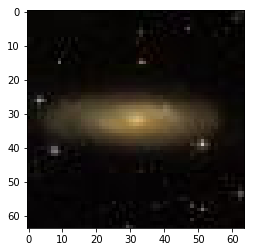

In [296]:
i = 800

plt.imshow(images_train1[i])
print labels_train1[i]

In [0]:
images_cvl = np.concatenate((images_cvl, images_cvl1))
labels_cvl = np.concatenate((labels_cvl, labels_cvl1))
pgcIDs_cvl = np.concatenate((pgcIDs_cvl, pgcIDs_cvl1))

images_test = np.concatenate((images_test, images_test1))
labels_test = np.concatenate((labels_test, labels_test1))
pgcIDs_test = np.concatenate((pgcIDs_test, pgcIDs_test1))

images_train = np.concatenate((images_train, images_train1))
labels_train = np.concatenate((labels_train, labels_train1))
pgcIDs_train = np.concatenate((pgcIDs_train, pgcIDs_train1))


In [298]:
print images_cvl.shape, labels_cvl.shape
print images_test.shape, labels_test.shape
print images_train.shape, labels_train.shape


(600, 64, 64, 3) (600,)
(549, 64, 64, 3) (549,)
(29011, 64, 64, 3) (29011,)


In [299]:
print len(labels_train[labels_train==0])
print len(labels_train[labels_train==1])


13980
15031


0


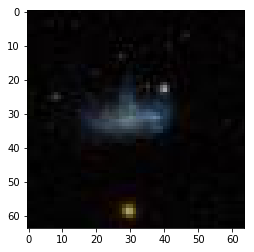

In [300]:
i = 6500

plt.imshow(images_train[i])
print labels_train[i]

In [0]:
np.random.seed(400)

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

import numpy as np
def vgg6(input_shape=(64, 64, 3), n_classes=2):
    """
        VGG6
    :param input_shape:
    :param n_classes:
    :return:
    """

    model = tf.keras.models.Sequential(name='VGG6')
    # input: 64x64 images with 3 channel -> (64, 64, 3) tensors.
    # this applies 16 convolution filters of size 3x3 each.
    model.add(tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=input_shape, name='conv1'))
    model.add(tf.keras.layers.Conv2D(16, (3, 3), activation='relu', name='conv2'))
    model.add(tf.keras.layers.BatchNormalization(axis = 3, name = 'bn_1'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(tf.keras.layers.Dropout(0.20))

    model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', name='conv3'))
    model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', name='conv4'))
    model.add(tf.keras.layers.BatchNormalization(axis = 3, name = 'bn_2'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(tf.keras.layers.Dropout(0.20))

    model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', name='conv5'))
    model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', name='conv6'))
    model.add(tf.keras.layers.BatchNormalization(axis = 3, name = 'bn_3'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(tf.keras.layers.Dropout(0.20))


    model.add(tf.keras.layers.Flatten())

    model.add(tf.keras.layers.Dense(256, activation='relu', name='fc_1'))
    model.add(tf.keras.layers.Dropout(0.20))
    
    model.add(tf.keras.layers.Dense(128, activation='relu', name='fc_2'))
    model.add(tf.keras.layers.Dropout(0.20))

    # model.add(tf.keras.layers.Dense(64, activation='relu', name='fc_3'))
    # model.add(tf.keras.layers.Dropout(0.20))

    # model.add(tf.keras.layers.Dense(32, activation='relu', name='fc_4'))
    # model.add(tf.keras.layers.Dropout(0.20))


    # output layer
    activation = 'sigmoid' if n_classes == 1 else 'softmax'
    model.add(tf.keras.layers.Dense(n_classes, activation=activation, name='fc_out'))

    return model

In [302]:
vgg_model = vgg6()
vgg_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
n_epochs=10
vgg_model.summary()
vgg_model_history = vgg_model.fit(images_train, labels_train, 
                                  epochs=n_epochs, batch_size=512, verbose=2, 
                                  validation_data=(images_test, labels_test),
                                  shuffle=True)


Model: "VGG6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv2D)               (None, 62, 62, 16)        448       
_________________________________________________________________
conv2 (Conv2D)               (None, 60, 60, 16)        2320      
_________________________________________________________________
bn_1 (BatchNormalization)    (None, 60, 60, 16)        64        
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 30, 30, 16)        0         
_________________________________________________________________
dropout_65 (Dropout)         (None, 30, 30, 16)        0         
_________________________________________________________________
conv3 (Conv2D)               (None, 28, 28, 32)        4640      
_________________________________________________________________
conv4 (Conv2D)               (None, 26, 26, 32)        9248   

In [0]:
flag_p = vgg_model.predict(images_train)
flag_m = labels_train

2755
0 1 [27.733934 72.26607 ]
5057033


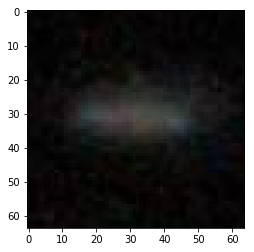

In [362]:
i = 0 
for ix, pgc in enumerate(pgcIDs_train):
  if pgc==5057033:
    i = ix
    break


# i=231
print i

plt.imshow(images_train[i])
print flag_m[i], np.argmax(flag_p[i] ), flag_p[i]*100
print pgcIDs_train[i]